In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.stats import normaltest, probplot
from sklearn.metrics import mean_squared_error, mean_absolute_error

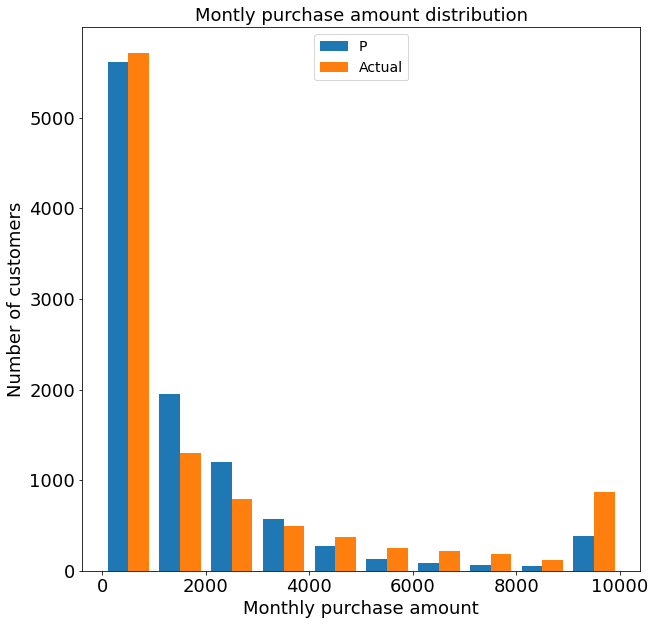

In [2]:
with open("../pickle/results_purchase.pickle", "rb") as fp:
    res = pickle.load(fp)
res=res['test']
plt.figure(figsize=[10, 10])
sc=np.exp(res.scores)
sc[sc>10000]=10000
ac=np.exp(res.actual)
ac[ac>10000]=10000
plt.hist([sc,ac],label=["Predicted","Actual"]);
plt.title("Montly purchase amount distribution",fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Monthly purchase amount",fontsize=18)
plt.ylabel("Number of customers", fontsize=18)
plt.legend(loc='upper center',fontsize=14);


5.677971020791208
1.4900319510226296
2623.468100388626
9070.245339221583


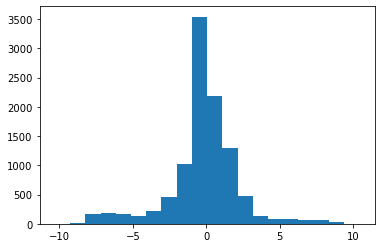

Text(0, 0.5, 'Number of customers')

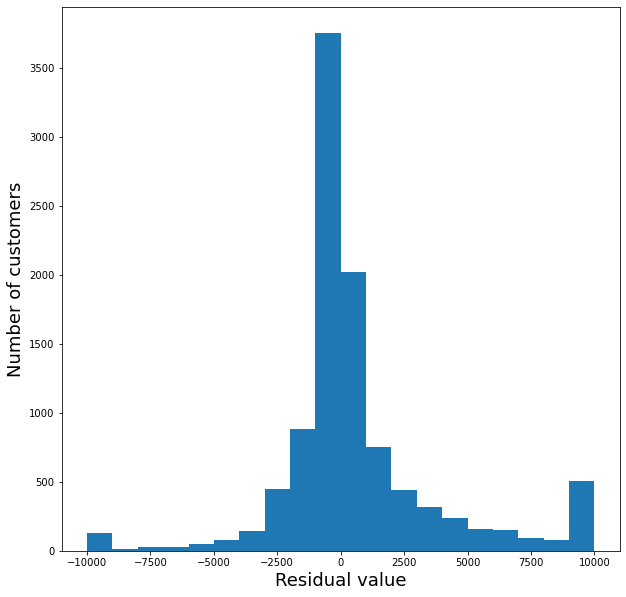

In [3]:
logresid=res.actual-res.scores
print(mean_squared_error(res.actual, res.scores))
print(mean_absolute_error(res.actual, res.scores))
print(mean_absolute_error(np.exp(res.actual),np.exp(res.scores)))
print(np.sqrt(mean_squared_error(np.exp(res.actual),np.exp(res.scores))))
plt.hist(logresid,bins=20);
plt.show()
resid=np.exp(res.actual)-np.exp(res.scores)
resid[resid>10000]=10000
resid[resid<-10000]=-10000
fig=plt.figure(figsize=[10, 10])
plt.hist(resid,bins=20);
plt.xlabel("Residual value",fontsize=18)
plt.ylabel("Number of customers",fontsize=18)

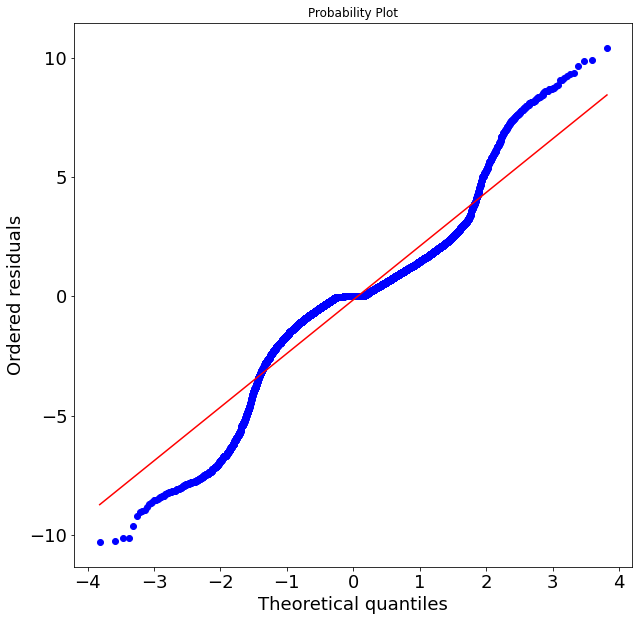

In [4]:
fig=plt.figure(figsize=[10, 10])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
probplot(logresid, dist="norm",plot=plt);
plt.xlabel("Theoretical quantiles",fontsize=18);
plt.ylabel("Ordered residuals",fontsize=18);